In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv('cs-training.csv').drop(['Unnamed: 0'], axis =1 ) #dropping serial number column                   
test = pd.read_csv('cs-test.csv').drop(['Unnamed: 0'], axis =1 )

In [9]:
#train.head() # viewing dataframe
train.duplicated().value_counts() # 609 duplicate values
train_redup = train.drop_duplicates() # deleting duplicates 
train_redup.duplicated().value_counts() # no more duplicates 
train.shape # originally 150,000 data records with 11 columns
train_redup.shape # after removing duplicates 149391 data records with 11 columns 

(149391, 11)

In [10]:
def findmiss (df) :
    return round (df.isnull().sum()/df.shape[0]*100,2)
#function to calcualte percentage of missing values for a dataframe 
#findmiss (train_redup)

In [11]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [13]:
fam_miss['NumberOfDependents']= fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome']= fam_miss['MonthlyIncome'].fillna(0)

C:\Users\muham\AppData\Local\Temp\ipykernel_16988\3334677801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents']= fam_miss['NumberOfDependents'].fillna(0)
C:\Users\muham\AppData\Local\Temp\ipykernel_16988\3334677801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome']= fam_miss['MonthlyIncome'].fillna(0)


In [15]:
findmiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [16]:
findmiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [18]:
fam_nmiss['MonthlyIncome']= fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

C:\Users\muham\AppData\Local\Temp\ipykernel_16988\2062926826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome']= fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [19]:
findmiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [23]:
filled_train = pd.concat([fam_nmiss, fam_miss], ignore_index=True)

In [25]:
filled_train.shape
findmiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [26]:
filled_train.head() #we are trying to predict seriousdlqin 2yearsbn

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [38]:
util_dropped= filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] >10].index)
util_dropped.shape # records that we are left with

(149150, 11)

In [42]:
temp = util_dropped[(util_dropped['DebtRatio']>3492) & (util_dropped['SeriousDlqin2yrs'] == util_dropped['MonthlyIncome'])]

In [51]:
dRatio = util_dropped.drop(temp.index)
dRatio.shape

(148768, 11)

In [55]:
dRatio.groupby('SeriousDlqin2yrs').size()/dRatio.shape[0]

SeriousDlqin2yrs
0    0.932848
1    0.067152
dtype: float64

In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
model = XGBClassifier(tree_method = 'exact')

In [65]:
x = dRatio.drop(['SeriousDlqin2yrs'], axis = 1)
y = dRatio['SeriousDlqin2yrs']

In [66]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

In [67]:
accuracy_score(y, y_pred)

0.9465207571520757

In [70]:
cm = confusion_matrix (y,y_pred)

Text(50.722222222222214, 0.5, 'actual')

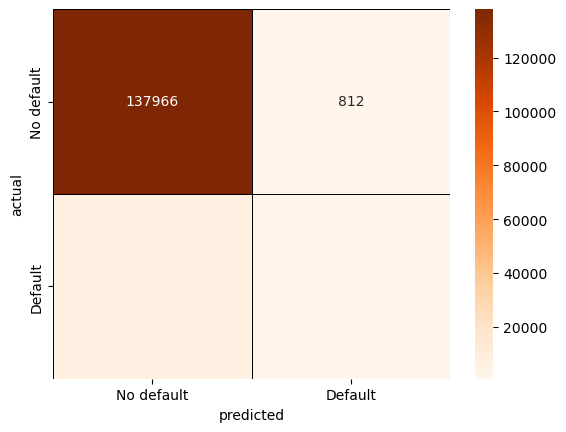

In [78]:
sns.heatmap(cm,annot=True, fmt = 'd', cmap = 'Oranges', linewidths = 0.5, linecolor = 'Black')
plt.xticks(np.arange(2) +.5, ['No default' , 'Default'])
plt.yticks(np.arange(2) +.5, ['No default' , 'Default'])
plt.xlabel ('predicted')
plt.ylabel('actual')

In [81]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138778
           1       0.78      0.28      0.42      9990

    accuracy                           0.95    148768
   macro avg       0.86      0.64      0.69    148768
weighted avg       0.94      0.95      0.93    148768

